# Neural-based channel decoders


Start EbN0 1/20 [-15.0]
Start EbN0 2/20 [-13.89]
Start EbN0 3/20 [-12.79]
Start EbN0 4/20 [-11.68]
Start EbN0 5/20 [-10.58]
Start EbN0 6/20 [-9.47]
Start EbN0 7/20 [-8.37]
Start EbN0 8/20 [-7.26]
Start EbN0 9/20 [-6.16]
Start EbN0 10/20 [-5.05]
Start EbN0 11/20 [-3.95]
Start EbN0 12/20 [-2.84]
Start EbN0 13/20 [-1.74]
Start EbN0 14/20 [-0.63]
Start EbN0 15/20 [0.47]
Start EbN0 16/20 [1.58]
Start EbN0 17/20 [2.68]
Start EbN0 18/20 [3.79]
Start EbN0 19/20 [4.89]
Start EbN0 20/20 [6.0]


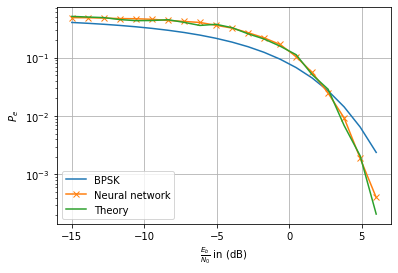

Elapsed : 19.81 s


In [2]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import keras 
import time

from keras.models import load_model

from src.communications import Transmitter, AWGNChannel, Receiver, ReceiverMode, TransmitterMode
from src.utils import ber_performance, get_basic_channel_fct, show_ber, get_fec_matrix

# Configuration
MODULATION = 'BPSK'
FEC_MATRIX = 'POLAR_8_16'
EbN0dBs = np.linspace(-15, 6, 20)

# Load models
encoder_model = load_model('networks/encoder.h5')
decoder_model = load_model('networks/decoder.h5')
G = get_fec_matrix(FEC_MATRIX)

# Load channel components
transmitter = Transmitter(MODULATION, G, TransmitterMode.NETWORK, encoder_model)
channel = AWGNChannel(MODULATION, G)
receiver = Receiver(MODULATION, G, ReceiverMode.NETWORK, decoder_model)

if __name__ == '__main__':
    t = time.time()
    BER = ber_performance(
        EbN0dBs,
        get_basic_channel_fct(transmitter, channel, receiver),
        np.size(G, 0) * 5000,
        200
    )
    
    # Plot results
    [EbN0dBs_C, BER_C] = np.loadtxt('BER_G_MAP.csv', delimiter=',')
    
    plt.figure()
    show_ber(MODULATION, EbN0dBs, BER)
    plt.plot(EbN0dBs_C, BER_C)
    plt.legend(['BPSK', 'Neural network', 'Theory'])
    plt.show()
    
    # Save results
    np.savetxt(
        f'outputs/BER_complete_[{MODULATION}]_[{FEC_MATRIX}].csv', 
        [np.array(EbN0dBs), np.array(BER)], delimiter=','
    )
    
    print(f'Elapsed : {np.round(time.time() - t, 2)} s')


In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import keras 
import time

from keras.models import load_model

from src.communications import Transmitter, AWGNChannel, Receiver, ReceiverMode, TransmitterMode
from src.utils import ber_performance, get_basic_channel_fct, show_ber, get_fec_matrix

# Configuration
MODULATION = 'BPSK'
FEC_MATRIX = 'POLAR_8_16'
EbN0dBs = np.linspace(-15, 6, 20)

# Load models
encoder_model = load_model('networks/encoder.h5')
decoder_model = load_model('networks/decoder.h5')
G = get_fec_matrix(FEC_MATRIX)

# Load channel components
transmitter = Transmitter(MODULATION, G, TransmitterMode.NETWORK, encoder_model)
channel = AWGNChannel(MODULATION, G)
receiver = Receiver(MODULATION, G, ReceiverMode.NETWORK, decoder_model)


b = [1, 0, 1, 1, 0, 1, 0, 1]
c = transmitter.transmit(b)
d = channel.process(c, -2)

b_d = receiver.receive(d)

print(b)
print(c)
print(d)
print(b_d)

Using TensorFlow backend.


[1, 0, 1, 1, 0, 1, 0, 1]
[ 1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1.]
[ 0.8503614   1.18173338  1.76919728  2.35710815 -0.40012686  0.2125305
  0.23157249 -0.73977177  1.02612086  1.64205544  1.39142397  1.52914313
 -1.84362459 -0.82514701  0.94150621 -2.4088039 ]
[0 0 0 0 1 0 0 0]
